## Phoneme Classification
Many binary classification tasks do not have an equal number of examples from each class, e.g.
the class distribution is skewed or imbalanced. Nevertheless, accuracy is equally important in
both classes.
An example is the classification of vowel sounds from European languages as either nasal
or oral in speech recognition where there are many more examples of nasal than oral vowels.
Classification accuracy is important for both classes, although accuracy as a metric cannot be
used directly because of the outcome class imbalance. Additionally, data sampling techniques
may be required to transform the training dataset to make it more balanced when fitting machine
learning algorithms.



#### Phoneme Dataset
In this project, we will use a standard imbalanced machine learning dataset referred to as
the Phoneme dataset. This dataset is credited to the ESPRIT (European Strategic Program
on Research in Information Technology) project titled ROARS (Robust Analytical Speech
Recognition System) and described in progress reports and technical reports from that project.

There are two classes for the two types of sounds; they are:
- Class 0: Nasal Vowels (majority class).
- Class 1: Oral Vowels (minority class).


##### Explore the Dataset
The Phoneme dataset is a widely used standard machine learning dataset, used to explore and
demonstrate many techniques designed specifically for imbalanced classification. One example
is the popular SMOTE data oversampling technique

In [7]:
# test harness and baseline model evaluation
from collections import Counter
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier

In [2]:
# define the dataset location
filename = "E:\IMBALANCE ANALYSIS\phoneme.csv"
# load the csv file as a data frame
dataframe = read_csv(filename, header=None)
dataframe.head()

,0,1,2,3,4,5
0,1.240,0.875,-0.205,-0.078,0.067,0
1,0.268,1.352,1.035,-0.332,0.217,0
2,1.567,0.867,1.300,1.041,0.559,0
3,0.279,0.990,2.555,-0.738,0.000,0
4,0.307,1.272,2.656,-0.946,-0.467,0


In [3]:
# summarize the shape of the dataset
print(dataframe.shape)

(5404, 6)


In [6]:
# summarize the class distribution
target = dataframe.values[: , -1]
counter = Counter(target)
for k, v in counter.items():
    per = v / len(target) * 100
    print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=0.0, Count=3818, Percentage=70.651%
Class=1.0, Count=1586, Percentage=29.349%


Running the example first loads the dataset and confirms the number of rows and columns,
that is 5,404 rows and five input variables and one target variable. The class distribution is
then summarized, confirming a modest class imbalance with approximately 70 percent for the
majority class (nasal) and approximately 30 percent for the minority class (oral).

look at the distribution of the five numerical input variables by creating
a histogram for each.

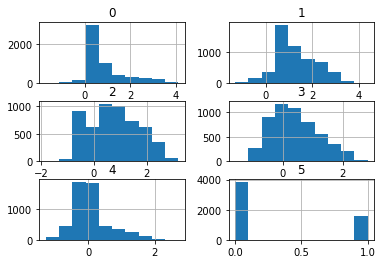

In [8]:
# histogram of all variables

dataframe.hist()
pyplot.show()

Running the example creates the figure with one histogram subplot for each of the five
numerical input variables in the dataset, as well as the numerical class label. We can see that
the variables have differing scales, although most appear to have a Gaussian or Gaussian-like
distribution. Depending on the choice of modeling algorithms, we would expect scaling the
distributions to the same range to be useful, and perhaps the use of some power transforms.



creating a scatter plot for each pair of input variables, called a scatter plot matrix.
This can be helpful to see if any variables relate to each other or change in the same direction,
i.e. are correlated.I can also color the dots of each scatter plot according to the class label.
In this case, the majority class (nasal) will be mapped to blue dots and the minority class (oral)
will be mapped to red dots.



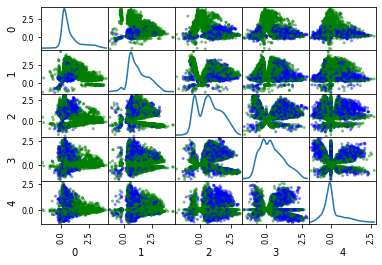

In [13]:
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

# load the csv file as a data frame
df = read_csv(filename, header=None)
# define a mapping of class values to colors

color_dict = {0: 'green', 1: 'blue'}
# map each row to a color based on the class value
colors = [color_dict[x] for x in df.values[:, -1]]

# Drop the target variables
inputs = DataFrame(df.values[:, :-1])

# pairwise scatter plots of all numerical variables
scatter_matrix(inputs, diagonal = 'kde', color = colors)
pyplot.show()

Running the example creates a figure showing the scatter plot matrix, with five plots by five
plots, comparing each of the five numerical input variables with each other. The diagonal of
the matrix shows the density distribution of each variable. Each pairing appears twice, both
above and below the top-left to bottom-right diagonal, providing two ways to review the same
variable interactions. i can see that the distributions for many variables do differ for the two
class labels, suggesting that some reasonable discrimination between the classes will be feasible

#### Model Test and Baseline Result
Evaluating candidate models using repeated stratified k-fold cross-validation. The k-fold
cross-validation procedure provides a good general estimate of model performance that is not too
optimistically biased, at least compared to a single train-test split. We will use k=10, meaning
each fold will contain about 5404
10 or about 540 examples. Stratified means that each fold will
contain the same mixture of examples by class, that is about 70 percent to 30 percent nasal to
oral vowels. Repetition indicates that the evaluation process will be performed multiple times
to help avoid fluke results and better capture the variance of the chosen model. We will use
three repeats.
This means a single model will be fit and evaluated 10 × 3 (30) times and the mean
and standard deviation of these runs will be reported. This can be achieved using the
RepeatedStratifiedKFold scikit-learn class. Class labels will be predicted and both class
labels are equally important. Therefore, we will select a metric that quantifies the performance
of a model on both classes separately. You may remember that the sensitivity is a measure of
the accuracy for the positive class and specificity is a measure of the accuracy of the negative
class.
The G-mean seeks a balance of these scores, the geometric mean, where poor performance for
one or the other results in a low G-mean score. We can
calculate the G-mean for a set of predictions made by a model using the geometric mean score()
function provided by the imbalanced-learn library. I will define a function to load the dataset
and split the columns into input and output variables.

In [14]:
# test harness and baseline model evaluation
from collections import Counter
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier

# load the dataset
def load_dataset(full_path):

    # load the dataset as a numpy array
    data = read_csv(full_path, header=None)

    # retrieve numpy array
    data = data.values

    # split into input and output elements
    X, y = data[:, :-1], data[:, -1]
    return X, y


# evaluate a model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define the model evaluation metric
    metric = make_scorer(geometric_mean_score)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores


# define the location of the dataset
filename = "E:\IMBALANCE ANALYSIS\phoneme.csv"

# load the dataset
X, y = load_dataset(filename)

# summarize the loaded dataset
print(X.shape, y.shape, Counter(y))

# define the reference model
model = DummyClassifier(strategy='uniform')

# evaluate the model
scores = evaluate_model(X, y, model)

# summarize performance
print('Mean G-Mean: %.3f (%.3f)' % (mean(scores), std(scores)))



(5404, 5) (5404,) Counter({0.0: 3818, 1.0: 1586})
Mean G-Mean: 0.502 (0.017)


Running the example first loads and summarizes the dataset.I can see that I have the
correct number of rows loaded and that we have five audio-derived input variables. Next, the
average of the G-mean scores is reported.

In this case, we can see that the baseline algorithm achieves a G-mean of about 0.509, close
to the theoretical maximum of 0.5. This score provides a lower limit on model skill; any model
that achieves an average G-mean above about 0.509 (or really above 0.5) has skill, whereas
models that achieve a score below this value do not have skill on this dataset.

### Evaluate Models
Evaluating a suite of different techniques on the dataset using the test
harness developed in the previous section. The goal is to both demonstrate how to work through
the problem systematically and to demonstrate the capability of some techniques designed for
imbalanced classification problems.



##### Evaluate Machine Learning Algorithms
Evaluating a mixture of machine learning models on the dataset. It can be a good
idea to spot-check a suite of different linear and nonlinear algorithms on a dataset to quickly
flush out what works well and deserves further attention, and what doesn’t. We will evaluate
the following machine learning models on the phoneme dataset:
- Logistic Regression (LR)
- Support Vector Machine (SVM)
- Bagged Decision Trees (BAG)
- Random Forest (RF)
- Extra Trees (ET)



>LR 0.636 (0.025)
>SVM 0.803 (0.021)
>BAG 0.887 (0.017)
>RF 0.890 (0.017)
>ET 0.897 (0.018)


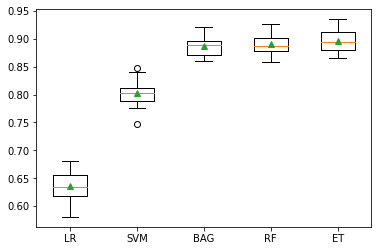

In [16]:
# spot check machine learning algorithms on the phoneme dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier


# load the dataset
def load_dataset(filename):
    # load the dataset as a numpy array
    data = read_csv(filename, header=None)
    # retrieve numpy array
    data = data.values
    # split into input and output elements
    X, y = data[:, :-1], data[:, -1]
    return X, y



# evaluate a model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define the model evaluation metric
    metric = make_scorer(geometric_mean_score)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores


# define models to test
def get_models():
    models, names = list(), list()

    # LR
    models.append(LogisticRegression(solver='lbfgs'))
    names.append('LR')

    # SVM
    models.append(SVC(gamma='scale'))
    names.append('SVM')

    # Bagging
    models.append(BaggingClassifier(n_estimators=1000))
    names.append('BAG')

    # RF
    models.append(RandomForestClassifier(n_estimators=1000))
    names.append('RF')

    # ET
    models.append(ExtraTreesClassifier(n_estimators=1000))
    names.append('ET')
    return models, names


# define the location of the dataset
filename = "E:\IMBALANCE ANALYSIS\phoneme.csv"
# load the dataset
X, y = load_dataset(filename)

# define models
models, names = get_models()
results = list()

# evaluate each model
for i in range(len(models)):
    # evaluate the model and store results
    scores = evaluate_model(X, y, models[i])
    results.append(scores)

    # summarize and store
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Running the example evaluates each algorithm in turn and reports the mean and standard
deviation G-mean.

In this case, i can see that all of the tested algorithms have skill, achieving a G-mean above
the default of 0.5. The results suggest that the ensemble of decision tree algorithms perform
better on this dataset with perhaps Extra Trees (ET) performing the best with a G-mean of
about 0.897.


A figure is created showing one box and whisker plot for each algorithm’s sample of results.
The box shows the middle 50 percent of the data, the orange line in the middle of each box
shows the median of the sample, and the green triangle in each box shows the mean of the
sample. I can see that all three ensembles of trees algorithms (BAG, RF, and ET) have a
tight distribution and a mean and median that closely align, perhaps suggesting a non-skewed
and Gaussian distribution of scores, e.g. stable.


#### Evaluate Data Oversampling Algorithms
Data sampling provides a way to better prepare the imbalanced training dataset prior to fitting
a model. The simplest oversampling technique is to duplicate examples in the minority class,
called random oversampling. Perhaps the most popular oversampling method is the SMOTE
oversampling technique for creating new synthetic examples for the minority class. I will test
five different oversampling methods; specifically:

- Random Oversampling (ROS)
- SMOTE
- BorderLine SMOTE (BLSMOTE)
- SVM SMOTE
- ADASYN


Each technique will be tested with the best performing algorithm from the previous section,
specifically Extra Trees. We will use the default hyperparameters for each oversampling
algorithm, which will oversample the minority class to have the same number of examples as the
majority class in the training dataset. The expectation is that each oversampling technique will
result in a lift in performance compared to the algorithm without oversampling with the smallest
lift provided by Random Oversampling and perhaps the best lift provided by SMOTE or one
of its variations.I will update the get models() function to return lists of oversampling
algorithms to evaluate


I will then enumerate each and create a Pipeline from the imbalanced-learn library that
is aware of how to oversample a training dataset. This will ensure that the training dataset
within the cross-validation model evaluation is sampled correctly, without data leakage that
could result in an optimistic evaluation of model performance.
First, we will normalize the input variables because most oversampling techniques will make
use of a nearest neighbor algorithm and it is important that all variables have the same scale
when using this technique. This will be followed by a given oversampling algorithm, then ending
with the Extra Trees algorithm that will be fit on the oversampled training dataset.


>ROS 0.895 (0.020)
>SMOTE 0.905 (0.016)
>BLSMOTE 0.907 (0.015)
>SVMSMOTE 0.908 (0.016)
>ADASYN 0.909 (0.015)


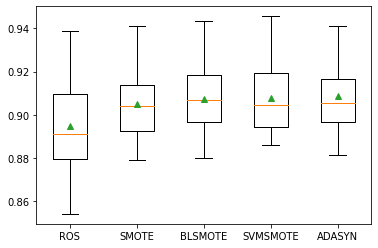

In [18]:
# data oversampling algorithms on the phoneme imbalanced dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline

# load the dataset
def load_dataset(filename):
    # load the dataset as a numpy array
    data = read_csv(filename, header=None)
    # retrieve numpy array
    data = data.values
    # split into input and output elements
    X, y = data[:, :-1], data[:, -1]
    return X, y

# evaluate a model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define the model evaluation metric
    metric = make_scorer(geometric_mean_score)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores

# define oversampling models to test
def get_models():
    models, names = list(), list()

    # RandomOverSampler
    models.append(RandomOverSampler())
    names.append('ROS')

    # SMOTE
    models.append(SMOTE())
    names.append('SMOTE')

    # BorderlineSMOTE
    models.append(BorderlineSMOTE())
    names.append('BLSMOTE')

    # SVMSMOTE
    models.append(SVMSMOTE())
    names.append('SVMSMOTE')

    # ADASYN
    models.append(ADASYN())
    names.append('ADASYN')
    return models, names

# define the location of the dataset
filename = "E:\IMBALANCE ANALYSIS\phoneme.csv"
# load the dataset
X, y = load_dataset(filename)

# define models
models, names = get_models()
results = list()

# evaluate each model
for i in range(len(models)):
    # define the model
    model = ExtraTreesClassifier(n_estimators=1000)

    # define the pipeline steps
    steps = [('s', MinMaxScaler()), ('o', models[i]), ('m', model)]

    # define the pipeline
    pipeline = Pipeline(steps=steps)

    # evaluate the model and store results
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)

    # summarize and store
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


Running the example evaluates each oversampling method with the Extra Trees model on
the dataset.

In this case, as we expected, each oversampling technique resulted in a lift in performance for
the ET algorithm without any oversampling (0.896), except the random oversampling technique.
The results suggest that the modified versions of SMOTE and ADASYN performed better than
default SMOTE, and in this case, ADASYN achieved the best G-mean score of 0.910.


### Make Prediction on New Data
In this section, i will fit a final model and use it to make predictions on single rows of data.
i will use the ADASYN oversampled version of the Extra Trees model as the final model and
a normalization scaling on the data prior to fitting the model and making a prediction. Using
the pipeline will ensure that the transform is always performed correctly. First, i can define
the model as a pipeline.


In [20]:
# fit a model and make predictions for the phoneme dataset
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.pipeline import Pipeline

# load the dataset
def load_dataset(full_path):
    # load the dataset as a numpy array
    data = read_csv(full_path, header=None)
    # retrieve numpy array
    data = data.values
    # split into input and output elements
    X, y = data[:, :-1], data[:, -1]
    return X, y


# define the location of the dataset
filename = "E:\IMBALANCE ANALYSIS\phoneme.csv"

# load the dataset
X, y = load_dataset(filename)

# define the model
model = ExtraTreesClassifier(n_estimators=1000)

# define the pipeline steps
steps = [('s', MinMaxScaler()), ('o', ADASYN()), ('m', model)]

# define the pipeline
pipeline = Pipeline(steps=steps)

# fit the model
pipeline.fit(X, y)

# evaluate on some nasal cases (known class 0)
print('Nasal:')

data = [[1.24,0.875,-0.205,-0.078,0.067],
[0.268,1.352,1.035,-0.332,0.217],
[1.567,0.867,1.3,1.041,0.559]]


for row in data:

    # make prediction
    yhat = pipeline.predict([row])

    # get the label
    label = yhat[0]

    # summarize
    print('>Predicted=%d (expected 0)' % (label))

# evaluate on some oral cases (known class 1)
print('Oral:')
data = [[0.125,0.548,0.795,0.836,0.0],
[0.318,0.811,0.818,0.821,0.86],
[0.151,0.642,1.454,1.281,-0.716]]

for row in data:

    # make prediction
    yhat = pipeline.predict([row])

    # get the label
    label = yhat[0]
    
    # summarize
    print('>Predicted=%d (expected 1)' % (label))


Nasal:
>Predicted=0 (expected 0)
>Predicted=0 (expected 0)
>Predicted=0 (expected 0)
Oral:
>Predicted=1 (expected 1)
>Predicted=1 (expected 1)
>Predicted=1 (expected 1)
